In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [60]:
df=pd.read_csv('/content/Traffic.csv')
df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal


<Axes: xlabel='Day of the week', ylabel='Total'>

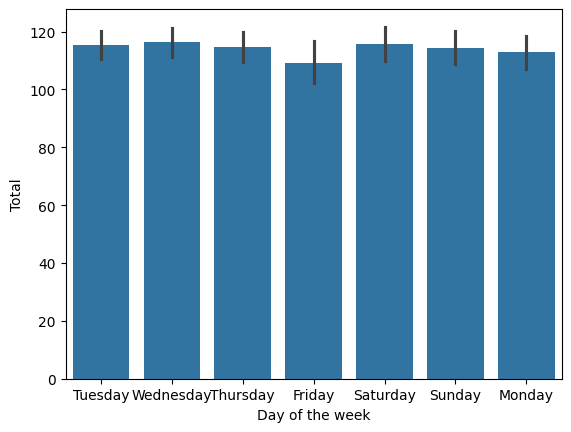

In [61]:
sns.barplot(x='Day of the week',y='Total',data=df)

<Axes: xlabel='Date', ylabel='Total'>

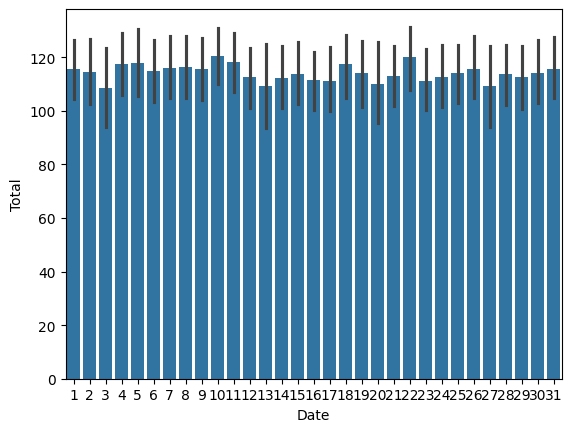

In [62]:
sns.barplot(x='Date',y='Total',data=df)

<Axes: xlabel='Traffic Situation', ylabel='count'>

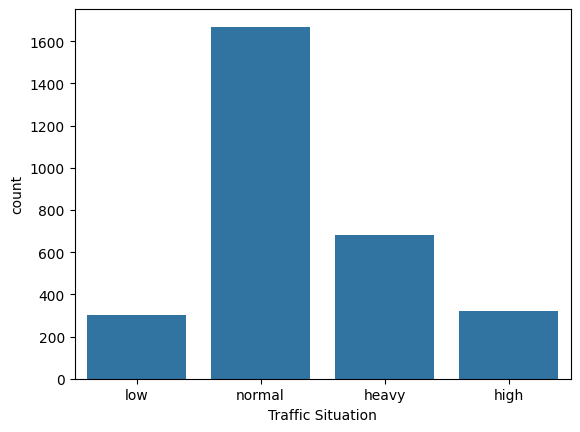

In [63]:
sns.countplot(x=df['Traffic Situation'])

In [64]:
df.shape

(2976, 9)

In [65]:
df.describe()

,Date,CarCount,BikeCount,BusCount,TruckCount,Total
count,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000
mean,16.000000,68.696573,14.917339,15.279570,15.324933,114.218414
std,8.945775,45.850693,12.847518,14.341986,10.603833,60.190627
min,1.000000,6.000000,0.000000,0.000000,0.000000,21.000000
25%,8.000000,19.000000,5.000000,1.000000,6.000000,55.000000
50%,16.000000,64.000000,12.000000,12.000000,14.000000,109.000000
75%,24.000000,107.000000,22.000000,25.000000,23.000000,164.000000
max,31.000000,180.000000,70.000000,50.000000,40.000000,279.000000


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               2976 non-null   object
 1   Date               2976 non-null   int64 
 2   Day of the week    2976 non-null   object
 3   CarCount           2976 non-null   int64 
 4   BikeCount          2976 non-null   int64 
 5   BusCount           2976 non-null   int64 
 6   TruckCount         2976 non-null   int64 
 7   Total              2976 non-null   int64 
 8   Traffic Situation  2976 non-null   object
dtypes: int64(6), object(3)
memory usage: 209.4+ KB


In [67]:
df.isnull().sum()

,0
Time,0
Date,0
Day of the week,0
CarCount,0
BikeCount,0
BusCount,0
TruckCount,0
Total,0
Traffic Situation,0


In [68]:
from sklearn.preprocessing import LabelEncoder
le1=LabelEncoder()
df['Traffic Situation']=le1.fit_transform(df['Traffic Situation'])
le2=LabelEncoder()
df['Day of the week']=le2.fit_transform(df['Day of the week'])

In [69]:
df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,5,31,0,4,4,39,2
1,12:15:00 AM,10,5,49,0,3,3,55,2
2,12:30:00 AM,10,5,46,0,3,6,55,2
3,12:45:00 AM,10,5,51,0,2,5,58,2
4,1:00:00 AM,10,5,57,6,15,16,94,3


In [70]:
df['Hour'] = pd.to_datetime(df['Time'], format='%I:%M:%S %p').dt.hour
df['Minute'] = pd.to_datetime(df['Time'], format='%I:%M:%S %p').dt.minute

In [71]:
df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,Hour,Minute
0,12:00:00 AM,10,5,31,0,4,4,39,2,0,0
1,12:15:00 AM,10,5,49,0,3,3,55,2,0,15
2,12:30:00 AM,10,5,46,0,3,6,55,2,0,30
3,12:45:00 AM,10,5,51,0,2,5,58,2,0,45
4,1:00:00 AM,10,5,57,6,15,16,94,3,1,0


In [72]:
x=df.drop(['Time','Traffic Situation','CarCount','BikeCount','BusCount','TruckCount'],axis=1)
y=df['Traffic Situation']

In [73]:
x.head()

,Date,Day of the week,Total,Hour,Minute
0,10,5,39,0,0
1,10,5,55,0,15
2,10,5,55,0,30
3,10,5,58,0,45
4,10,5,94,1,0


In [74]:
y.head()

,Traffic Situation
0,2
1,2
2,2
3,2
4,3


In [75]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [76]:
x_train.shape

(2380, 5)

In [77]:
y_train.shape

(2380,)

In [78]:
x_test.shape

(596, 5)

In [79]:
y_test.shape

(596,)

In [80]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [81]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
model=RandomForestClassifier(random_state=42)
model.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [83]:
y_pred=model.predict(x_test)

In [84]:
y_pred

array([3, 3, 3, 1, 3, 3, 3, 3, 2, 3, 0, 1, 3, 3, 2, 1, 1, 3, 1, 3, 1, 3,
       0, 3, 0, 3, 0, 3, 0, 1, 3, 3, 2, 2, 3, 0, 1, 2, 3, 0, 3, 3, 3, 3,
       0, 3, 3, 2, 2, 3, 3, 0, 3, 3, 2, 3, 3, 3, 3, 2, 3, 0, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 0, 3, 0, 2, 3, 0,
       0, 0, 3, 3, 3, 3, 0, 0, 0, 3, 3, 3, 1, 3, 0, 3, 1, 3, 0, 3, 3, 3,
       0, 3, 3, 3, 0, 0, 3, 0, 2, 2, 1, 3, 0, 2, 3, 1, 2, 3, 0, 3, 1, 3,
       2, 0, 0, 3, 3, 2, 3, 0, 3, 1, 0, 1, 0, 1, 0, 0, 3, 0, 3, 0, 2, 2,
       3, 1, 3, 2, 3, 1, 0, 3, 2, 1, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       0, 3, 3, 3, 1, 3, 3, 3, 3, 1, 0, 3, 0, 3, 3, 3, 0, 0, 1, 3, 3, 0,
       3, 2, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 0, 3, 0, 1, 3, 3, 3,
       1, 3, 3, 3, 0, 3, 3, 3, 3, 0, 0, 3, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0,
       3, 0, 3, 3, 1, 0, 1, 3, 3, 3, 3, 0, 3, 3, 1, 0, 1, 0, 3, 3, 3, 3,
       1, 3, 3, 3, 3, 0, 0, 0, 1, 2, 3, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 0, 3, 0, 1, 0, 3, 3, 1, 3, 0, 0, 2,

In [85]:
y_test=np.array(y_test)

In [86]:
y_test

array([2, 1, 3, 1, 3, 2, 3, 3, 3, 3, 0, 3, 2, 3, 2, 1, 1, 3, 3, 3, 3, 3,
       0, 3, 0, 3, 0, 3, 0, 1, 3, 3, 3, 2, 3, 0, 1, 2, 3, 0, 3, 3, 3, 3,
       0, 3, 3, 3, 2, 2, 3, 0, 3, 3, 2, 3, 3, 3, 3, 3, 3, 0, 3, 3, 2, 3,
       3, 3, 1, 3, 2, 3, 2, 3, 3, 2, 3, 1, 1, 3, 3, 3, 0, 3, 0, 3, 3, 0,
       0, 0, 3, 3, 1, 3, 0, 0, 0, 3, 3, 3, 3, 3, 0, 3, 3, 2, 0, 3, 3, 3,
       0, 3, 1, 3, 0, 0, 3, 0, 2, 2, 1, 2, 0, 2, 3, 3, 2, 3, 0, 2, 1, 1,
       3, 0, 0, 3, 3, 3, 3, 0, 3, 1, 0, 1, 0, 1, 0, 0, 2, 0, 3, 0, 3, 2,
       2, 1, 3, 3, 3, 1, 0, 3, 2, 1, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 1,
       0, 3, 3, 3, 1, 2, 3, 3, 3, 3, 0, 3, 0, 1, 3, 3, 0, 0, 3, 3, 2, 0,
       3, 3, 3, 2, 2, 3, 3, 3, 2, 0, 3, 3, 3, 3, 3, 0, 3, 0, 3, 3, 3, 3,
       1, 3, 3, 2, 0, 3, 3, 3, 3, 0, 0, 1, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0,
       3, 0, 3, 3, 3, 0, 1, 3, 3, 3, 2, 0, 3, 3, 1, 0, 1, 0, 3, 3, 3, 3,
       1, 3, 3, 3, 3, 0, 0, 0, 1, 2, 2, 3, 0, 3, 0, 3, 3, 3, 3, 3, 1, 3,
       3, 3, 2, 0, 3, 0, 1, 0, 3, 3, 1, 3, 0, 0, 3,

In [87]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_test,y_pred)

0.8305369127516778

In [88]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       127
           1       0.63      0.67      0.65        63
           2       0.65      0.42      0.51        66
           3       0.83      0.88      0.86       340

    accuracy                           0.83       596
   macro avg       0.77      0.74      0.75       596
weighted avg       0.82      0.83      0.82       596



In [89]:
confusion_matrix(y_test,y_pred)

array([[127,   0,   0,   0],
       [  0,  42,   0,  21],
       [  0,   0,  28,  38],
       [  2,  25,  15, 298]])

In [90]:
example = {
    'Date':25,
    'Total': 67,
    'Hour': 9,
    'Minute': 30,
    'DayEncoded': le2.transform(['Monday'])[0]
}
example=pd.DataFrame(example,index=[0])
example

,Date,Total,Hour,Minute,DayEncoded
0,25,67,9,30,1


In [91]:
example=sc.fit_transform(example)

In [92]:
pred = model.predict(example)
pred_label = le1.inverse_transform(pred)

In [93]:
print("Predicted Traffic Situation:", pred_label[0])

Predicted Traffic Situation: high
